**PROYEK ANALISIS DATA : BIKE SHARING**

- Nama : Muhammad Syahrul Majid
- Email : majidsyahrul30@gmail.com
- ID Dicoding : -

**MENENTUKAN PERTANYAAN BISNIS**

1. Bagaimana perbedaan dalam pola penggunaan sepeda antara hari kerja dan akhir pekan?
2. Bagaimana cuaca mempengaruhi keputusan pelanggan untuk meminjam sepeda?
3. Bagaimana musim mempengaruhi keputusan pelanggan untuk meminjam sepeda?

**MENYIAPKAN SEMUA LIBRARY YANG DIBUTUHKAN**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATA WRANGLING**

**Gathering Data**

In [2]:
#Membaca dan Menampilkan Data
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Assesing Data**

In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
#Cek Missing Value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Tidak ada missing value

In [5]:
#Statistik Deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
#Cek data duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Cleaning Data**

In [7]:
#Mengubah nama kolom agar mudah dimengerti
hour_df = hour_df.rename(columns={
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'weathersit':'weather',
    'hum':'humidity',
    'cnt':'count'
})
hour_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
#Menghapus kolom yang tidak dibutuhkan
hour_df = hour_df.drop(columns=['instant','dteday','year'])

In [9]:
#Mengubah tipe data pada beberapa kolom ke bentuk category
kolom = ['season','month','hour','holiday','weekday','workingday','weather']

for i in kolom:
    hour_df[i] = hour_df[i].astype('category')

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


Beberapa kolom tipe datanya sudah berubah ke category.

In [11]:
#Mengubah nilai pada kolom season, month, weather dan weekday
hour_df['season'].replace((1,2,3,4), ('Musim_Semi','Musim_Panas','Musim_Gugur','Musim_Dingin'), inplace=True)
hour_df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'), inplace=True)
hour_df['weather'].replace((1,2,3,4), ('Cerah','Berkabut','Hujan_Ringan','Hujan_Berat'), inplace=True)
hour_df['weekday'].replace((0,1,2,3,4,5,6), ('Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu'), inplace=True)
hour_df.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,Musim_Semi,Januari,0,0,Sabtu,0,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,Musim_Semi,Januari,1,0,Sabtu,0,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,Musim_Semi,Januari,2,0,Sabtu,0,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,Musim_Semi,Januari,3,0,Sabtu,0,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,Musim_Semi,Januari,4,0,Sabtu,0,Cerah,0.24,0.2879,0.75,0.0,0,1,1


**EXPLORATORY DATA ANALYSIS (EDA)**

**Explore ...**

In [12]:
hour_df.groupby(by='workingday')['count'].mean().sort_values().reset_index()

,workingday,count
0,0,181.405332
1,1,193.207754


In [13]:
hour_df.groupby(by=['workingday','hour'])['count'].mean().sort_values(ascending=False).reset_index().head()

,workingday,hour,count
0,1,17,525.290581
1,1,18,492.226908
2,1,8,477.006048
3,0,13,372.731602
4,0,12,366.259740


- Pada hari kerja, jam 5 sore merupakan waktu dengan peminjaman sepeda terbanyak.
- Pada akhir pekan, jam 1 siang merupakan waktu dengan peminjaman sepeda terbanyak.

In [14]:
hour_df.groupby(by='weather')['count'].mean().sort_values(ascending=False).reset_index()

,weather,count
0,Cerah,204.869272
1,Berkabut,175.165493
2,Hujan_Ringan,111.579281
3,Hujan_Berat,74.333333


Peminjaman sepeda terbanyak pada saat hari dengan cuaca cerah

In [15]:
hour_df.groupby(by='season')['count'].mean().sort_values(ascending=False).reset_index()

,season,count
0,Musim_Gugur,236.016237
1,Musim_Panas,208.344069
2,Musim_Dingin,198.868856
3,Musim_Semi,111.114569


Peminjaman sepeda terbanyak pada saat musim gugur.

In [16]:
hour_df.groupby(by='month')['count'].mean().sort_values(ascending=False).reset_index()

,month,count
0,September,240.773138
1,Juni,240.515278
2,Agustus,238.097627
3,Juli,231.819892
4,Mei,222.907258
5,Oktober,222.158511
6,April,187.260960
7,November,177.335421
8,Maret,155.410726
9,Desember,142.303439


Bulan September dan Juni merupakan bulan dengan peminjaman sepeda terbanyak.

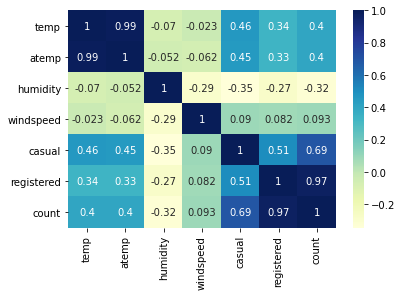

In [17]:
#cek korelasi antar numeric variabel
korelasi = hour_df.corr()
sns.heatmap(korelasi, annot=True, cmap='YlGnBu')
plt.show()

Kolom casual dan registered memiliki hubungan positif yang cukup kuat dengan kolom count (jumlah peminjaman sepeda)

**VISUALIZATION & EXPLANATORY ANALYSIS**

**Bagaimana perbedaan dalam pola penggunaan sepeda antara hari kerja dan akhir pekan?**

In [18]:
# Kelompokkan data berdasarkan hari kerja dan akhir pekan
weekday_data = hour_df[hour_df['workingday'] == 1]  # Hari kerja (Senin hingga Jumat)
weekend_data = hour_df[hour_df['workingday'] == 0]  # Akhir pekan (Sabtu dan Minggu)

# Hitung rata-rata peminjaman sepeda per jam pada hari kerja dan akhir pekan
weekday_avg = weekday_data.groupby('hour')['count'].mean()
weekend_avg = weekend_data.groupby('hour')['count'].mean()

C:\Users\majid\anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


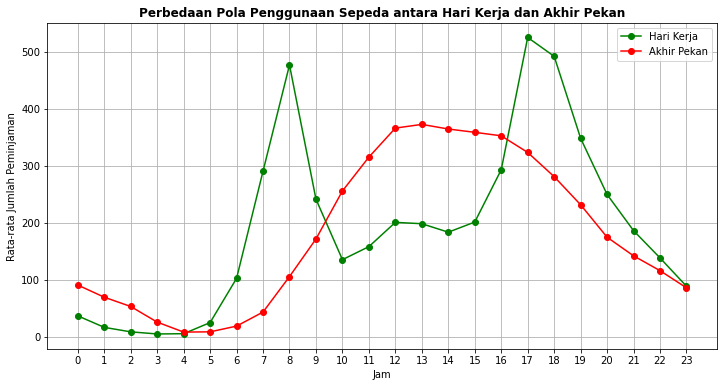

In [19]:
# Buat grafik untuk membandingkan pola penggunaan sepeda pada hari kerja dan akhir pekan
plt.figure(figsize=(12, 6))
plt.plot(weekday_avg, label='Hari Kerja', marker='o', color='g')
plt.plot(weekend_avg, label='Akhir Pekan', marker='o', color='r')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.title('Perbedaan Pola Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan', fontweight='bold')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

- Pada hari kerja, peminjaman sepeda terbanyak pada saat jam 8 pagi dan jam 5 sore
- Pada akhir pekan, peminjaman sepeda terbanyak pada saat jam 1 siang dan stabil sampai jam 4 sore.

**Bagaimana cuaca mempengaruhi keputusan pelanggan untuk meminjam sepeda?**

In [20]:
# Kelompokkan data berdasarkan kondisi cuaca dan hitung rata-rata jumlah peminjaman sepeda
data_cuaca = hour_df.groupby(by='weather')['count'].mean().sort_values(ascending=False).reset_index()

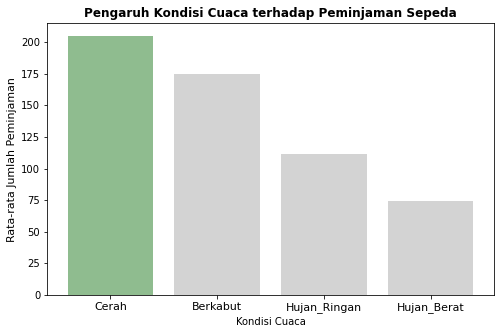

In [21]:
# Plot grafik batang
plt.figure(figsize=(8, 5))
plt.bar(data_cuaca['weather'], data_cuaca['count'], color=["#8FBC8F", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=11)
plt.title('Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)  
plt.show()

Peminjaman sepeda terbanyak pada saat hari dengan cuaca cerah

**Bagaimana musim mempengaruhi keputusan pelanggan untuk meminjam sepeda?**

In [22]:
# Kelompokkan data berdasarkan kondisi musim dan hitung rata-rata jumlah peminjaman sepeda
data_musim = hour_df.groupby(by='season')['count'].mean().sort_values(ascending=False).reset_index()

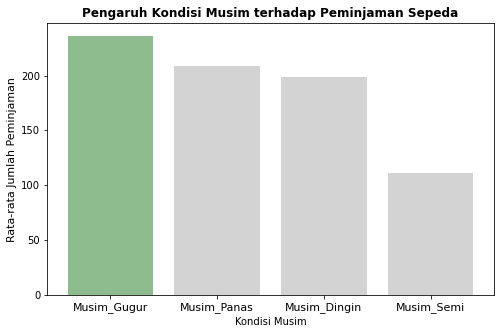

In [23]:
# Plot grafik batang
plt.figure(figsize=(8, 5))
plt.bar(data_musim['season'], data_musim['count'], color=["#8FBC8F", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.xlabel('Kondisi Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=11)
plt.title('Pengaruh Kondisi Musim terhadap Peminjaman Sepeda', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)  
plt.show()

Peminjaman sepeda terbanyak pada saat musim gugur

In [24]:
#Save dataset ke lokal
hour_df.to_csv('bike_data.csv', index=False)

**CONCLUSION**

1. Pada hari kerja, peminjaman sepeda terbanyak pada saat jam 8 pagi dan jam 5 sore, sedangkan pada akhir pekan peminjaman sepeda terbanyak pada saat jam 1 siang dan stabil sampai jam 4 sore. Rata-rata jumlah peminjaman sepeda saat weekday sebanyak 193 sepeda, sedangkan rata-rata peminjaman sepeda saat akhir pekan sebanyak 181 sepeda.
2. Cuaca memengaruhi terhadap jumlah peminjaman sepeda, peminjaman sepeda terbanyak pada saat hari dengan cuaca cerah.
3. Musim memengaruhi terhadap jumlah peminjaman sepeda, peminjaman sepeda terbanyak pada saat musim gugur.